In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
import string
from subprocess import call
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,  precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from collections import Counter
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
datasets = pd.read_csv('../jupyter/spam.csv', encoding='latin-1')
datasets.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
datasets.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
datasets.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
datasets.shape

(5572, 5)

In [ ]:
datasets.drop_duplicates(inplace=True)

In [ ]:
datasets.shape

(5169, 5)

In [ ]:
datasets.dropna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [ ]:
datasets.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
datasets.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
datasets.shape

(5169, 5)

In [ ]:
datasets.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
datasets = datasets.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
datasets.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
datasets.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
datasets.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


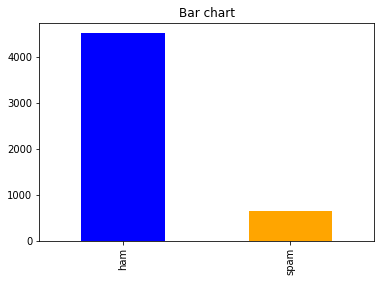

In [ ]:
count_Class=pd.value_counts(datasets["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

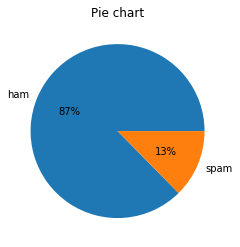

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
count1 = Counter(" ".join(datasets[datasets['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(datasets[datasets['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

In [ ]:
count1

[('to', 1450),
 ('you', 1412),
 ('I', 1349),
 ('the', 954),
 ('a', 884),
 ('i', 714),
 ('and', 712),
 ('in', 677),
 ('u', 576),
 ('my', 570),
 ('is', 561),
 ('me', 513),
 ('for', 452),
 ('of', 452),
 ('that', 387),
 ('it', 357),
 ('your', 346),
 ('have', 337),
 ('on', 334),
 ('at', 316)]

In [ ]:
df1.head(5)

,words in non-spam,count
0,to,1450
1,you,1412
2,I,1349
3,the,954
4,a,884


In [ ]:
count2

[('to', 522),
 ('a', 314),
 ('your', 171),
 ('call', 163),
 ('the', 160),
 ('or', 155),
 ('for', 152),
 ('2', 151),
 ('you', 150),
 ('is', 130),
 ('Call', 116),
 ('on', 112),
 ('have', 110),
 ('from', 109),
 ('and', 102),
 ('&', 89),
 ('with', 86),
 ('ur', 86),
 ('of', 79),
 ('FREE', 75)]

In [ ]:
df2.head(5)

,words in spam,count_
0,to,522
1,a,314
2,your,171
3,call,163
4,the,160


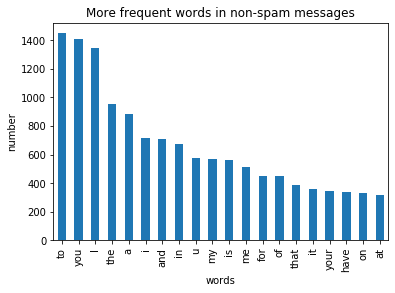

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

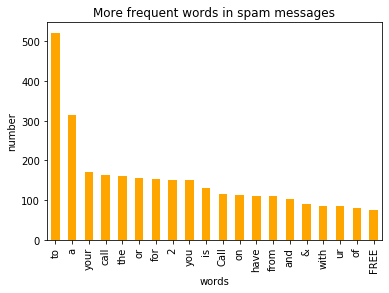

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [ ]:
f = CountVectorizer(analyzer=process_text, ngram_range=(1,1))
X = f.fit_transform(datasets["v2"])
features_names = (f.get_feature_names())
print(np.shape(X))
print(X)
print(X.toarray())

(5169, 11304)
  (0, 2027)	1
  (0, 7456)	1
  (0, 8809)	1
  (0, 5685)	1
  (0, 1096)	1
  (0, 5136)	1
  (0, 8231)	1
  (0, 6846)	1
  (0, 11043)	1
  (0, 7567)	1
  (0, 6131)	1
  (0, 5135)	1
  (0, 1461)	1
  (0, 6815)	1
  (0, 4574)	1
  (0, 10845)	1
  (1, 3012)	1
  (1, 7600)	1
  (1, 2407)	1
  (1, 10952)	1
  (1, 10582)	1
  (1, 8482)	1
  (2, 1909)	1
  (2, 6244)	2
  (2, 422)	1
  :	:
  (5165, 6791)	1
  (5165, 11239)	1
  (5165, 6604)	1
  (5165, 6267)	1
  (5166, 8147)	1
  (5166, 3169)	1
  (5166, 3655)	1
  (5166, 10087)	1
  (5167, 7698)	1
  (5167, 10886)	1
  (5167, 8314)	1
  (5167, 10669)	1
  (5167, 6612)	1
  (5167, 9804)	1
  (5167, 6196)	1
  (5167, 6710)	1
  (5167, 5169)	1
  (5167, 7297)	1
  (5167, 6892)	1
  (5167, 7190)	1
  (5167, 4430)	1
  (5167, 4973)	1
  (5168, 8243)	1
  (5168, 10532)	1
  (5168, 3370)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
Tf = TfidfTransformer().fit(X)
TfIdf = Tf.transform(X)

In [ ]:
print(TfIdf)
print(TfIdf.shape)

  (0, 11043)	0.23362550288913797
  (0, 10845)	0.18912922721966238
  (0, 8809)	0.24504052500844833
  (0, 8231)	0.17277993912650455
  (0, 7567)	0.2620709520744533
  (0, 7456)	0.3106987686443139
  (0, 6846)	0.18403659729779012
  (0, 6815)	0.15041037286783446
  (0, 6131)	0.1875223407042468
  (0, 5685)	0.24784822748179564
  (0, 5136)	0.266754906831088
  (0, 5135)	0.2964760440516562
  (0, 4574)	0.3106987686443139
  (0, 2027)	0.24784822748179564
  (0, 1461)	0.3106987686443139
  (0, 1096)	0.2964760440516562
  (1, 10952)	0.3985330995258944
  (1, 10582)	0.210030311470123
  (1, 8482)	0.5029497463839672
  (1, 7600)	0.37449838839717486
  (1, 3012)	0.29857982734049593
  (1, 2407)	0.5609823823005392
  (2, 11003)	0.19166832663213945
  (2, 10964)	0.1604625123145342
  (2, 10570)	0.13955327933884518
  :	:
  (5165, 6791)	0.3136877494578963
  (5165, 6604)	0.47764282672881725
  (5165, 6267)	0.5582328646646405
  (5165, 4801)	0.3841832382835868
  (5166, 10087)	0.5152093809578943
  (5166, 8147)	0.4513068593750

In [ ]:
df_idf = pd.DataFrame(Tf.idf_, index=features_names,columns=["idf_weights"])

df_idf.sort_values(by=['idf_weights'])

,idf_weights
u,3.316217
2,3.653474
call,3.833600
get,3.833600
Im,3.912273
...,...
abroad,8.857481
absence,8.857481
absolutely,8.857481
aathiwhere,8.857481


In [ ]:
datasets["v1"]=datasets["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(TfIdf, datasets['v1'], test_size=0.30, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3618, 11304), (1551, 11304)]


In [ ]:
print("X_train : ",type(X_train)," X_test : ",type(X_test))
print("")
print("y_train : ",type(y_train)," y_test : ",type(y_test))

X_train :  <class 'scipy.sparse.csr.csr_matrix'>  X_test :  <class 'scipy.sparse.csr.csr_matrix'>

y_train :  <class 'pandas.core.series.Series'>  y_test :  <class 'pandas.core.series.Series'>


In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

1757    0
1048    0
4917    0
3113    0
2607    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: v1, Length: 3618, dtype: int64

In [ ]:
y_test

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
1666    0
3778    1
2397    0
1569    0
1800    0
Name: v1, Length: 1551, dtype: int64

In [ ]:
#Multinomial Naive Bayes
Bayes = naive_bayes.MultinomialNB().fit(X_train, y_train)

In [ ]:
#MultiNomial Naive Bayes Training Phase

In [ ]:
Bptr = Bayes.predict(X_train)
Bptr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
Bactr = y_train.values
Bactr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
Bconfs = confusion_matrix(Bactr, Bptr)

In [ ]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,126,307


In [ ]:
BaS = accuracy_score(Bactr, Bptr)
BaS

0.9651741293532339

In [ ]:
BpS = precision_score(Bactr, Bptr)
BpS

1.0

In [ ]:
BrS = recall_score(Bactr, Bptr)
BrS

0.7090069284064665

In [ ]:
BfS = f1_score(Bactr, Bptr)
BfS

0.8297297297297298

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.965174,1.0,0.709007,0.82973


In [ ]:
Bclasr = classification_report(Bactr, Bptr)
print(Bclasr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3185
           1       1.00      0.71      0.83       433

    accuracy                           0.97      3618
   macro avg       0.98      0.85      0.91      3618
weighted avg       0.97      0.97      0.96      3618



In [ ]:
#MultiNomial Naive Bayes Testing Phase

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

In [ ]:
Bptx = Bayes.predict(X_test)
Bptx

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
Bactx = y_test.values
Bactx

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
Bconfs = confusion_matrix(Bactx, Bptx)

In [ ]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1331,0
Actual 1,87,133


In [ ]:
BaS = accuracy_score(Bactx, Bptx)
BaS

0.9439071566731141

In [ ]:
BpS = precision_score(Bactx, Bptx)
BpS

1.0

In [ ]:
BrS = recall_score(Bactx, Bptx)
BrS

0.6045454545454545

In [ ]:
BfS = f1_score(Bactx, Bptx)
BfS

0.7535410764872521

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,0.943907,1.0,0.604545,0.753541


In [ ]:
Bclasr = classification_report(Bactx, Bptx)
print(Bclasr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.60      0.75       220

    accuracy                           0.94      1551
   macro avg       0.97      0.80      0.86      1551
weighted avg       0.95      0.94      0.94      1551



In [ ]:
#Decision Tree with gini-index
Decision_Tree = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

In [ ]:
#Decision Tree Training Phase

In [ ]:
Dptr = Decision_Tree.predict(X_train)
Dptr

In [ ]:
Dactr = y_train.values
Dactr

In [ ]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
DaS = accuracy_score(Dactr, Dptr)
DaS

In [ ]:
DpS = precision_score(Dactr, Dptr)
DpS

In [ ]:
DrS = recall_score(Dactr, Dptr)
DrS

In [ ]:
DfS = f1_score(Dactr, Dptr)
DfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtr

In [ ]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

In [ ]:
#Decision Tree Testing Phase

In [ ]:
Dptx = Decision_Tree.predict(X_test)
Dptx

In [ ]:
Dactx = y_test.values
Dactx

In [ ]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
DaS = accuracy_score(Dactx, Dptx)
DaS

In [ ]:
DpS = precision_score(Dactx, Dptx)
DpS

In [ ]:
DrS = recall_score(Dactx, Dptx)
DrS

In [ ]:
DfS = f1_score(Dactx, Dptx)
DfS

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

In [ ]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

In [ ]:
#Decision Tree with entropy
Decision_Tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [ ]:
#Decision Tree Training Phase

In [ ]:
Dptr = Decision_Tree.predict(X_train)
Dptr

In [ ]:
Dactr = y_train.values
Dactr

In [ ]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
DaS = accuracy_score(Dactr, Dptr)
DaS

In [ ]:
DpS = precision_score(Dactr, Dptr)
DpS

In [ ]:
DrS = recall_score(Dactr, Dptr)
DrS

In [ ]:
DfS = f1_score(Dactr, Dptr)
DfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtr

In [ ]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

In [ ]:
#Decision Tree Testing Phase

In [ ]:
Dptx = Decision_Tree.predict(X_test)
Dptx

In [ ]:
Dactx = y_test.values
Dactx

In [ ]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
DaS = accuracy_score(Dactx, Dptx)
DaS

In [ ]:
DpS = precision_score(Dactx, Dptx)
DpS

In [ ]:
DrS = recall_score(Dactx, Dptx)
DrS

In [ ]:
DfS = f1_score(Dactx, Dptx)
DfS

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

In [ ]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

In [ ]:
#Support Vector Classifier
model_svm = svm.SVC().fit(X_train, y_train)

In [ ]:
#Support Vector Classifier Training Phase

In [ ]:
Sptr = model_svm.predict(X_train)
Sptr

In [ ]:
Sactr = y_train.values
Sactr

In [ ]:
Sconfs = confusion_matrix(Sactr, Sptr)

In [ ]:
pd.DataFrame(data = Sconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
SaS = accuracy_score(Sactr, Sptr)
SaS

In [ ]:
SpS = precision_score(Sactr, Sptr)
SpS

In [ ]:
SrS = recall_score(Sactr, Sptr)
SrS

In [ ]:
SfS = f1_score(Sactr, Sptr)
SfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [SaS],
        "Precision": [SpS],
        "Recall": [SrS],
        "F1-Score": [SfS],
    }
)
Nmtr

In [ ]:
Sclasr = classification_report(Sactr, Sptr)
print(Sclasr)

In [ ]:
#Support Vector Classifier Testing Phase

In [ ]:
Sptx = model_svm.predict(X_test)
Sptx

In [ ]:
Sactx = y_test.values
Sactx

In [ ]:
Sconfs = confusion_matrix(Sactx, Sptx)

In [ ]:
pd.DataFrame(data = Sconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
SaS = accuracy_score(Sactx, Sptx)
SaS

In [ ]:
SpS = precision_score(Sactx, Sptx)
SpS

In [ ]:
SrS = recall_score(Sactx, Sptx)
SrS

In [ ]:
SfS = f1_score(Sactx, Sptx)
SfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [SaS],
        "Precision": [SpS],
        "Recall": [SrS],
        "F1-Score": [SfS],
    }
)
Nmtr

In [ ]:
Sclasr = classification_report(Sactx, Sptx)
print(Sclasr)

In [ ]:
#Random Forest with gini-index
ranfor_tree = RandomForestClassifier(n_estimators=31,criterion='gini').fit(X_train, y_train)

In [ ]:
#Radnom Forest Classifier Training Phase

In [ ]:
Rptr = ranfor_tree.predict(X_train)
Rptr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
Ractr = y_train.values
Ractr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
Rconfs = confusion_matrix(Ractr, Rptr)

In [ ]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,2,431


In [ ]:
RaS = accuracy_score(Ractr, Rptr)
RaS

0.9994472084024323

In [ ]:
RpS = precision_score(Ractr, Rptr)
RpS

1.0

In [ ]:
RrS = recall_score(Ractr, Rptr)
RrS

0.9953810623556582

In [ ]:
RfS = f1_score(Ractr, Rptr)
RfS

0.9976851851851852

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.999447,1.0,0.995381,0.997685


In [ ]:
Rclasr = classification_report(Ractr, Rptr)
print(Rclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3185
           1       1.00      1.00      1.00       433

    accuracy                           1.00      3618
   macro avg       1.00      1.00      1.00      3618
weighted avg       1.00      1.00      1.00      3618



In [ ]:
#Random Forest Classifier Testing Phase

In [ ]:
Rptx = ranfor_tree.predict(X_test)
Rptx

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
Ractx = y_test.values
Ractx

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
Rconfs = confusion_matrix(Ractx, Rptx)

In [ ]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1331,0
Actual 1,55,165


In [ ]:
RaS = accuracy_score(Ractx, Rptx)
RaS

0.9645390070921985

In [ ]:
RpS = precision_score(Ractx, Rptx)
RpS

1.0

In [ ]:
RrS = recall_score(Ractx, Rptx)
RrS

0.75

In [ ]:
RfS = f1_score(Ractx, Rptx)
RfS

0.8571428571428571

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.964539,1.0,0.75,0.857143


In [ ]:
Rclasr = classification_report(Ractx, Rptx)
print(Rclasr)

In [ ]:
#Random Forest with entropy
ranfor_tree = RandomForestClassifier(n_estimators=10,criterion='entropy').fit(X_train, y_train)
#est = ranfor_tree.estimators_[0]
#cn = datasets['v1']

In [ ]:
#with open("est1.dot", "w") as f:
#    f = export_graphviz(est, filled=True, rotate=True, rounded=True, max_depth=6, out_file=f)

In [ ]:
#import pydot
#(graph,) = pydot.graph_from_dot_file('../jupyter/est1.dot')
#graph.write_png('somefile1.png')

In [ ]:
#Radnom Forest Classifier Training Phase

In [ ]:
Rptr = ranfor_tree.predict(X_train)
Rptr

In [ ]:
Ractr = y_train.values
Ractr

In [ ]:
Rconfs = confusion_matrix(Ractr, Rptr)

In [ ]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
RaS = accuracy_score(Ractr, Rptr)
RaS

In [ ]:
RpS = precision_score(Ractr, Rptr)
RpS

In [ ]:
RrS = recall_score(Ractr, Rptr)
RrS

In [ ]:
RfS = f1_score(Ractr, Rptr)
RfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

In [ ]:
Rclasr = classification_report(Ractr, Rptr)
print(Rclasr)

In [ ]:
#Random Forest Classifier Testing Phase

In [ ]:
Rptx = ranfor_tree.predict(X_test)
Rptx

In [ ]:
Ractx = y_test.values
Ractx

In [ ]:
Rconfs = confusion_matrix(Ractx, Rptx)

In [ ]:
pd.DataFrame(data = Rconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
RaS = accuracy_score(Ractx, Rptx)
RaS

In [ ]:
RpS = precision_score(Ractx, Rptx)
RpS

In [ ]:
RrS = recall_score(Ractx, Rptx)
RrS

In [ ]:
RfS = f1_score(Ractx, Rptx)
RfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [RaS],
        "Precision": [RpS],
        "Recall": [RrS],
        "F1-Score": [RfS],
    }
)
Nmtr

In [ ]:
Rclasr = classification_report(Ractx, Rptx)
print(Rclasr)

In [ ]:
#Adaboost Classifier 
Ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=62).fit(X_train, y_train)

In [ ]:
#Adaboost Classifier training phase

In [ ]:
Aptr = Ada_class.predict(X_train)
Aptr

In [ ]:
Aactr = y_train.values
Aactr

In [ ]:
Aconfs = confusion_matrix(Aactr, Aptr)

In [ ]:
pd.DataFrame(data = Aconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
AaS = accuracy_score(Aactr, Aptr)
AaS

In [ ]:
ApS = precision_score(Aactr, Aptr)
ApS

In [ ]:
ArS = recall_score(Aactr, Aptr)
ArS

In [ ]:
AfS = f1_score(Aactr, Aptr)
AfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [AaS],
        "Precision": [ApS],
        "Recall": [ArS],
        "F1-Score": [AfS],
    }
)
Nmtr

In [ ]:
Aclasr = classification_report(Aactr, Aptr)
print(Aclasr)

In [ ]:
#Adaboost Classifier testing phase

In [ ]:
Aptx = Ada_class.predict(X_test)
Aptx

In [ ]:
Aactx = y_test.values
Aactx

In [ ]:
Aconfs = confusion_matrix(Aactx, Aptx)

In [ ]:
pd.DataFrame(data = Aconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
AaS = accuracy_score(Aactx, Aptx)
AaS

In [ ]:
ApS = precision_score(Aactx, Aptx)
ApS

In [ ]:
ArS = recall_score(Aactx, Aptx)
ArS

In [ ]:
AfS = f1_score(Aactx, Aptx)
AfS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [AaS],
        "Precision": [ApS],
        "Recall": [ArS],
        "F1-Score": [AfS],
    }
)
Nmtr

In [ ]:
Aclasr = classification_report(Aactx, Aptx)
print(Aclasr)

In [ ]:
#Bagging Classifier with decision tree
Bag_class =  BaggingClassifier(n_estimators=100).fit(X_train, y_train)

In [ ]:
#Bagging Classifier Training phase

In [ ]:
Bag_ptr = Bag_class.predict(X_train)
Bag_ptr

In [ ]:
Bag_actr = y_train.values
Bag_actr

In [ ]:
Bag_confs = confusion_matrix(Bag_actr, Bag_ptr)

In [ ]:
pd.DataFrame(data = Bag_confs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
Bag_aS = accuracy_score(Bag_actr, Bag_ptr)
Bag_aS

In [ ]:
Bag_pS = precision_score(Bag_actr, Bag_ptr)
Bag_pS

In [ ]:
Bag_rS = recall_score(Bag_actr, Bag_ptr)
Bag_rS

In [ ]:
Bag_fS = f1_score(Bag_actr, Bag_ptr)
Bag_fS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [Bag_aS],
        "Precision": [Bag_pS],
        "Recall": [Bag_rS],
        "F1-Score": [Bag_fS],
    }
)
Nmtr

In [ ]:
Bag_clasr = classification_report(Bag_actr, Bag_ptr)
print(Bag_clasr)

In [ ]:
#Bagging Classifier Testing phase

In [ ]:
Bag_ptx = Bag_class.predict(X_test)
Bag_ptx

In [ ]:
Bag_actx = y_test.values
Bag_actx

In [ ]:
Bag_confs = confusion_matrix(Bag_actx, Bag_ptx)

In [ ]:
pd.DataFrame(data = Bag_confs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

In [ ]:
Bag_aS = accuracy_score(Bag_actx, Bag_ptx)
Bag_aS

In [ ]:
Bag_pS = precision_score(Bag_actx, Bag_ptx)
Bag_pS

In [ ]:
Bag_rS = recall_score(Bag_actx, Bag_ptx)
Bag_rS

In [ ]:
Bag_fS = f1_score(Bag_actx, Bag_ptx)
Bag_fS

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [Bag_aS],
        "Precision": [Bag_pS],
        "Recall": [Bag_rS],
        "F1-Score": [Bag_fS],
    }
)
Nmtr

In [ ]:
Bag_clasr = classification_report(Bag_actx, Bag_ptx)
print(Bag_clasr)